In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ns = pd.read_csv("nordstrom-test1.csv")
ns = ns.dropna()
ns.head()

,PRODUCT_NAME,SKU,CATEGORY,SUBCATEGORY,BRAND,PRICE_CURRENT,PRICE_RETAIL,REVIEW_RATING,REVIEW_COUNT,PROMOTION,COLOR,RunDate
0,McKay Water Resistant Bootie,4350576,Women,Shoes,UGG®,75.00,150.0,4.4,680,50% off,1,3/13/2022 8:11
2,Classic Femme Mini Wedge Bootie,5324754,Women,Shoes,UGG®,80.00,160.0,4.6,431,50% off,1,3/13/2022 8:11
5,Low Key Slide Sandal,5605038,Women,Shoes,Seychelles,49.97,99.0,3.3,26,49% off,1,3/13/2022 8:11
6,PureBoost 21 Primegreen Running Shoe,5816757,Women,Shoes,adidas,97.50,130.0,4.5,97,25% off,1,3/13/2022 8:11
7,Odessa Crystal Block Heel Sandal,5839795,Women,Shoes,Jewel Badgley Mischka,71.40,119.0,3.7,3,40% off,43,3/13/2022 8:11


In [3]:
len(ns)

79

Text(0.5, 1.0, 'Prices Difference between Supplier and Retailer')

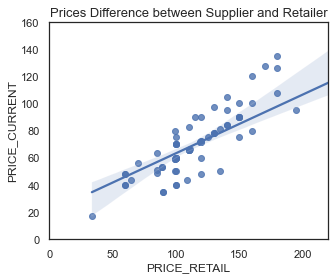

In [4]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
sns.regplot(y="PRICE_CURRENT",x="PRICE_RETAIL",data=ns)
plt.xlim(0,220)
plt.ylim(0,160)
plt.title("Prices Difference between Supplier and Retailer",fontsize=13)

Text(0, 0.5, 'BRAND')

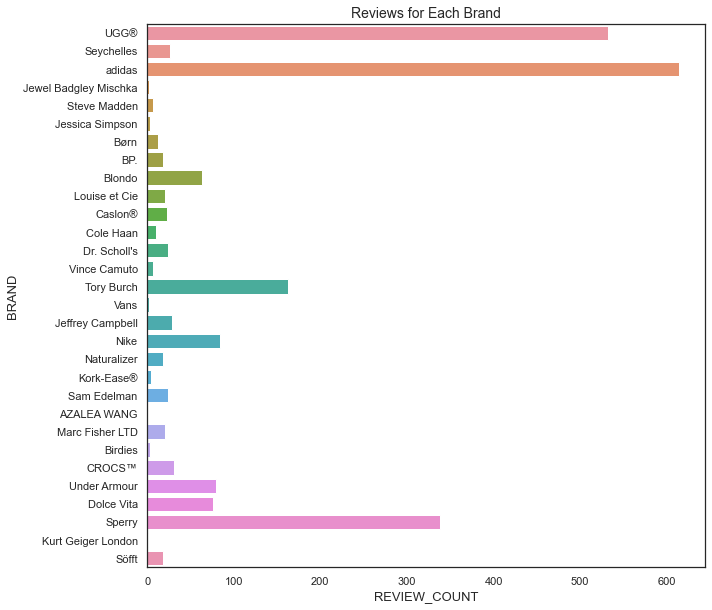

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
sns.barplot(x="REVIEW_COUNT",y="BRAND",data=ns,ci=False)
plt.title("Reviews for Each Brand",fontsize=14)
plt.xlabel('REVIEW_COUNT',fontsize=13)
plt.ylabel('BRAND',fontsize=13)

In [6]:
# split percentage with the word 'off' to generate visuals for promotions
ns['PROMOTION']
promotion=[x.split(' ',1)[0] for x in ns['PROMOTION']]
print(promotion)

['50%', '50%', '49%', '25%', '40%', '29%', '39%', '33%', '60%', '20%', '33%', '40%', '29%', '60%', '30%', '40%', '40%', '60%', '60%', '40%', '40%', '61%', '50%', '25%', '40%', '19%', '33%', '40%', '40%', '40%', '21%', '25%', '25%', '19%', '60%', '51%', '62%', '40%', '37%', '60%', '40%', '40%', '61%', '40%', '40%', '40%', '32%', '39%', '40%', '40%', '40%', '25%', '50%', '50%', '60%', '40%', '40%', '40%', '40%', '33%', '33%', '19%', '25%', '25%', '29%', '40%', '40%', '40%', '25%', '25%', '40%', '40%', '40%', '40%', '42%', '40%', '30%', '40%', '40%']


Text(0.5, 1.0, 'Promotions for Each Brand')

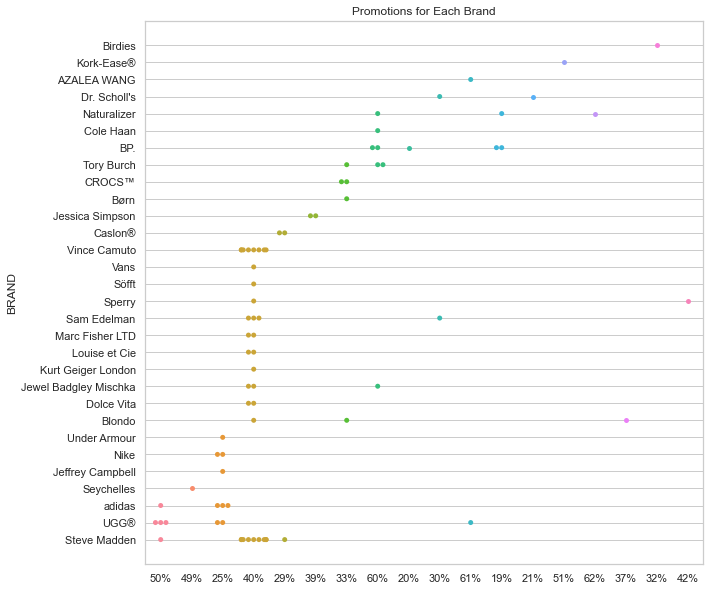

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
sns.swarmplot(x=promotion,y='BRAND',data=ns)
plt.title("Promotions for Each Brand")

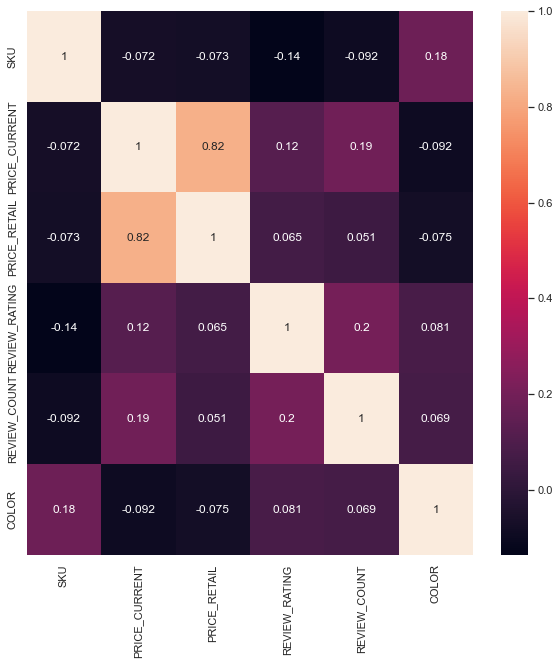

In [8]:
# correlation heatmap
corr = ns.corr()
sns.heatmap(corr,annot=True)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

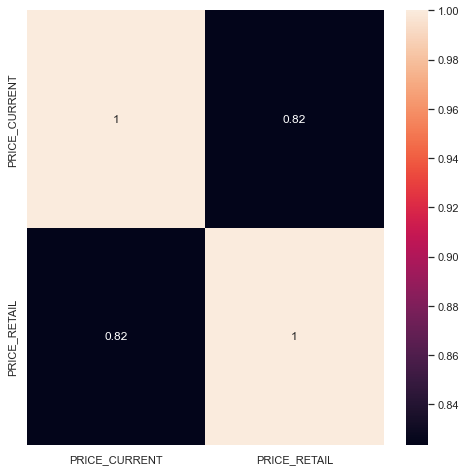

In [9]:
# correlation heatmap with adjusted columns
df = pd.DataFrame(ns,columns=['PRICE_CURRENT','PRICE_RETAIL'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()


In [11]:
# define x and y for the classification model and split the data into training and testing in 70:30 ratio.
# stimulate a linear regression model based on x and y training data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = ns[['PRICE_CURRENT']]
y = ns[["PRICE_RETAIL"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# standarize data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [12]:
# finding coefficient
y_pred = lr.predict(x_test)

coefficients = lr.coef_
print(f'Coefficients {coefficients}')

Coefficients [[42.46580992]]


In [13]:
# finding r-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.627775291474938


In [14]:
# finding mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 801.7618489902857


In [15]:
# finding Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 28.315399502572546


In [16]:
# finding Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 17.235736258668265
